In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.sample(n=10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15987,20,Federal-gov,225515,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,24,United-States,<=50K
14735,36,Private,242713,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,?,<=50K
31960,49,Private,94342,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
3802,56,State-gov,54260,Doctorate,16,Married-civ-spouse,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,2885,0,40,China,<=50K
5459,28,State-gov,73211,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<=50K
24633,46,Private,75256,HS-grad,9,Married-civ-spouse,Priv-house-serv,Wife,White,Female,0,0,40,United-States,<=50K
7686,27,Private,125298,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,0,50,United-States,<=50K
22797,29,Private,85572,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,42,United-States,>50K
19335,49,Federal-gov,195437,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,>50K
18791,42,Private,143046,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [32]:
for i in df.columns.tolist():
    if df[i].dtype != 'int64':
        print(f'Feature :::::: {i}')
        print(df[i].value_counts())
        print('#### \n')

Feature :::::: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
#### 

Feature :::::: education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
#### 

Feature :::::: marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
#### 

F

In [34]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

### Exploratory Data Analysis


In [36]:
datashape = df.shape
print(f'Total {datashape[0]} samples along with  {datashape[1]} features are present in dataset')

Total 32561 samples along with  15 features are present in dataset


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
numerics = ['int64','float64']
selective_df = df.select_dtypes(include = numerics)
print(f"Total {len(selective_df.columns)} are of numeric type")
selective_df.head()

Total 6 are of numeric type


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [45]:
numerics = ['object']
selective_df = df.select_dtypes(include = numerics)
print(f"Total {len(selective_df.columns)} are of non-numeric type")
selective_df.head()

Total 9 are of non-numeric type


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


<AxesSubplot:>

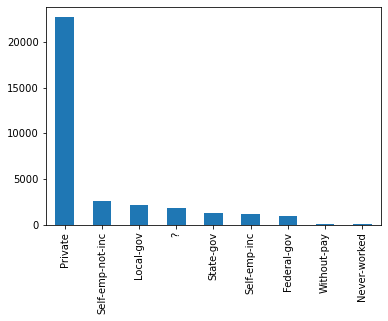

In [48]:
df['workclass'].value_counts().plot(kind='bar')

In [54]:
substitute_mapper = {
    'State-gov': "other",
    'Self-emp-inc': "other",
    'Federal-gov': "other",
    '?': "other",
    'Local-gov': "other",
    'Self-emp-not-inc': "other",
    'Without-pay': "other",
    'Never-worked': "other"
}
df['workclass']=df['workclass'].map(substitute_mapper).fillna(df['workclass'])

<AxesSubplot:>

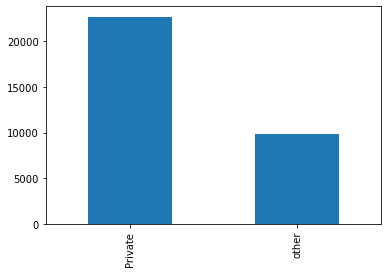

In [55]:
df['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

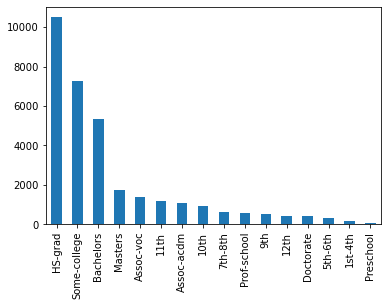

In [57]:
df['education'].value_counts().plot(kind='bar')

In [69]:
mapper ={'11th': "other",
         'Masters': "other",
         '9th': "other",
         'Assoc-acdm': "other",
         'Assoc-voc': "other",
         '7th-8th': "other",
         'Doctorate': "other",
         'Prof-school': "other",
         '5th-6th': "other",
         '10th': "other",
         '1st-4th': "other",
         'Preschool': "other",
         '12th': "other"}
df['education']=df['education'].map(mapper).fillna(df['education'])

<AxesSubplot:>

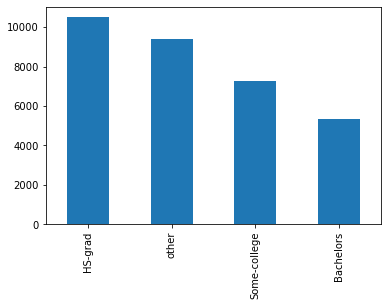

In [70]:
df['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

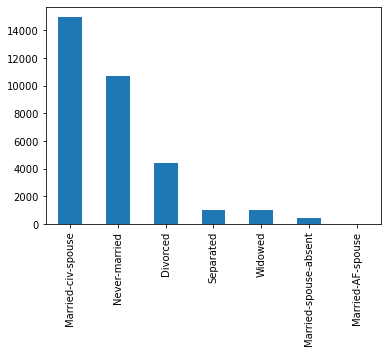

In [71]:
df['marital.status'].value_counts().plot(kind='bar')

In [73]:
mapper = {'Divorced': 'other',
 'Married-spouse-absent': 'other',
 'Separated': 'other',
 'Married-AF-spouse': 'other',
 'Widowed': 'other'}
df['marital.status'] = df['marital.status'].map(mapper).fillna(df['marital.status'])

<AxesSubplot:>

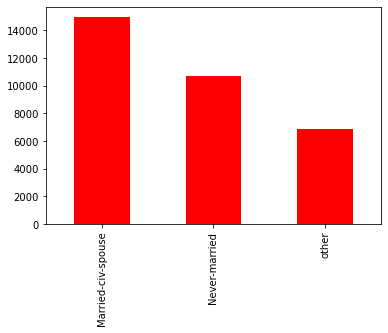

In [75]:
df['marital.status'].value_counts().plot(kind='bar',color='red')

<AxesSubplot:>

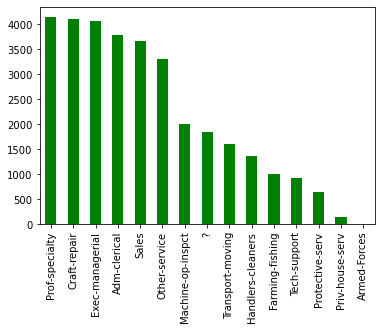

In [77]:
df['occupation'].value_counts().plot(kind='bar',color='green')

In [84]:
mapper = {
    '?': 'Prof-specialty',
    'Protective-serv': 'other',
    'Priv-house-serv': 'other',
    'Armed-Forces': 'other',
 }
df['occupation']=df['occupation'].map(mapper).fillna(df['occupation'])


<AxesSubplot:>

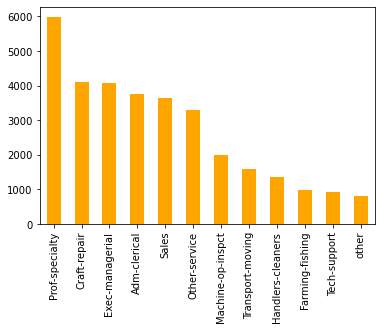

In [85]:
df['occupation'].value_counts().plot(kind='bar',color='orange')

In [89]:
df.drop(columns = ['fnlwgt'],axis = 1,inplace=True)

In [90]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [92]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:>

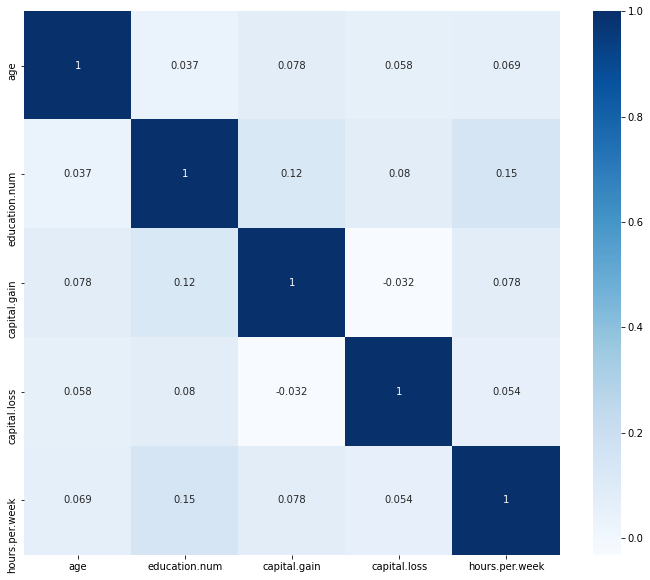

In [100]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap = plt.cm.Blues)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

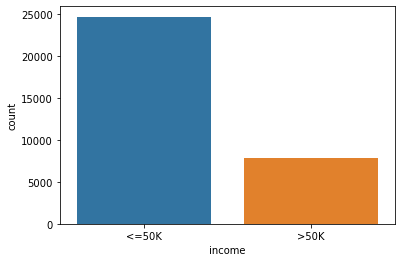

In [101]:
sns.countplot(df['income'])

In [105]:
from sklearn.preprocessing import LabelEncoder

In [107]:
labelled_income_data = df.apply(LabelEncoder().fit_transform)
labelled_income_data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,1,1,8,2,7,1,4,0,0,91,39,39,0
1,65,0,1,8,2,2,1,4,0,0,91,17,39,0
2,49,1,2,9,2,7,4,2,0,0,91,39,39,0
3,37,0,3,3,2,5,4,4,0,0,90,39,39,0
4,24,0,2,9,2,7,3,4,0,0,90,39,39,0


In [111]:
y = labelled_income_data['income']
x=labelled_income_data.drop('income',axis=1)

In [112]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [113]:
x.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,72,1,1,8,2,7,1,4,0,0,91,39,39
1,65,0,1,8,2,2,1,4,0,0,91,17,39
2,49,1,2,9,2,7,4,2,0,0,91,39,39
3,37,0,3,3,2,5,4,4,0,0,90,39,39
4,24,0,2,9,2,7,3,4,0,0,90,39,39


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [117]:
from sklearn.linear_model import LogisticRegression

In [122]:
y_pred = model.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [124]:
accuracy_score(y_pred,y_test)

0.8299723615518477

In [129]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.86      0.89      7988\n           1       0.53      0.69      0.60      1781\n\n    accuracy                           0.83      9769\n   macro avg       0.73      0.78      0.75      9769\nweighted avg       0.85      0.83      0.84      9769\n'

In [130]:
confusion_matrix(y_pred,y_test)

array([[6872, 1116],
       [ 545, 1236]], dtype=int64)